In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing 
import seaborn as sn 


In [2]:
pwd

'C:\\Users\\ashwin'

In [1]:
cd/Users/PA_LAB

C:\Users\PA_LAB


In [6]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

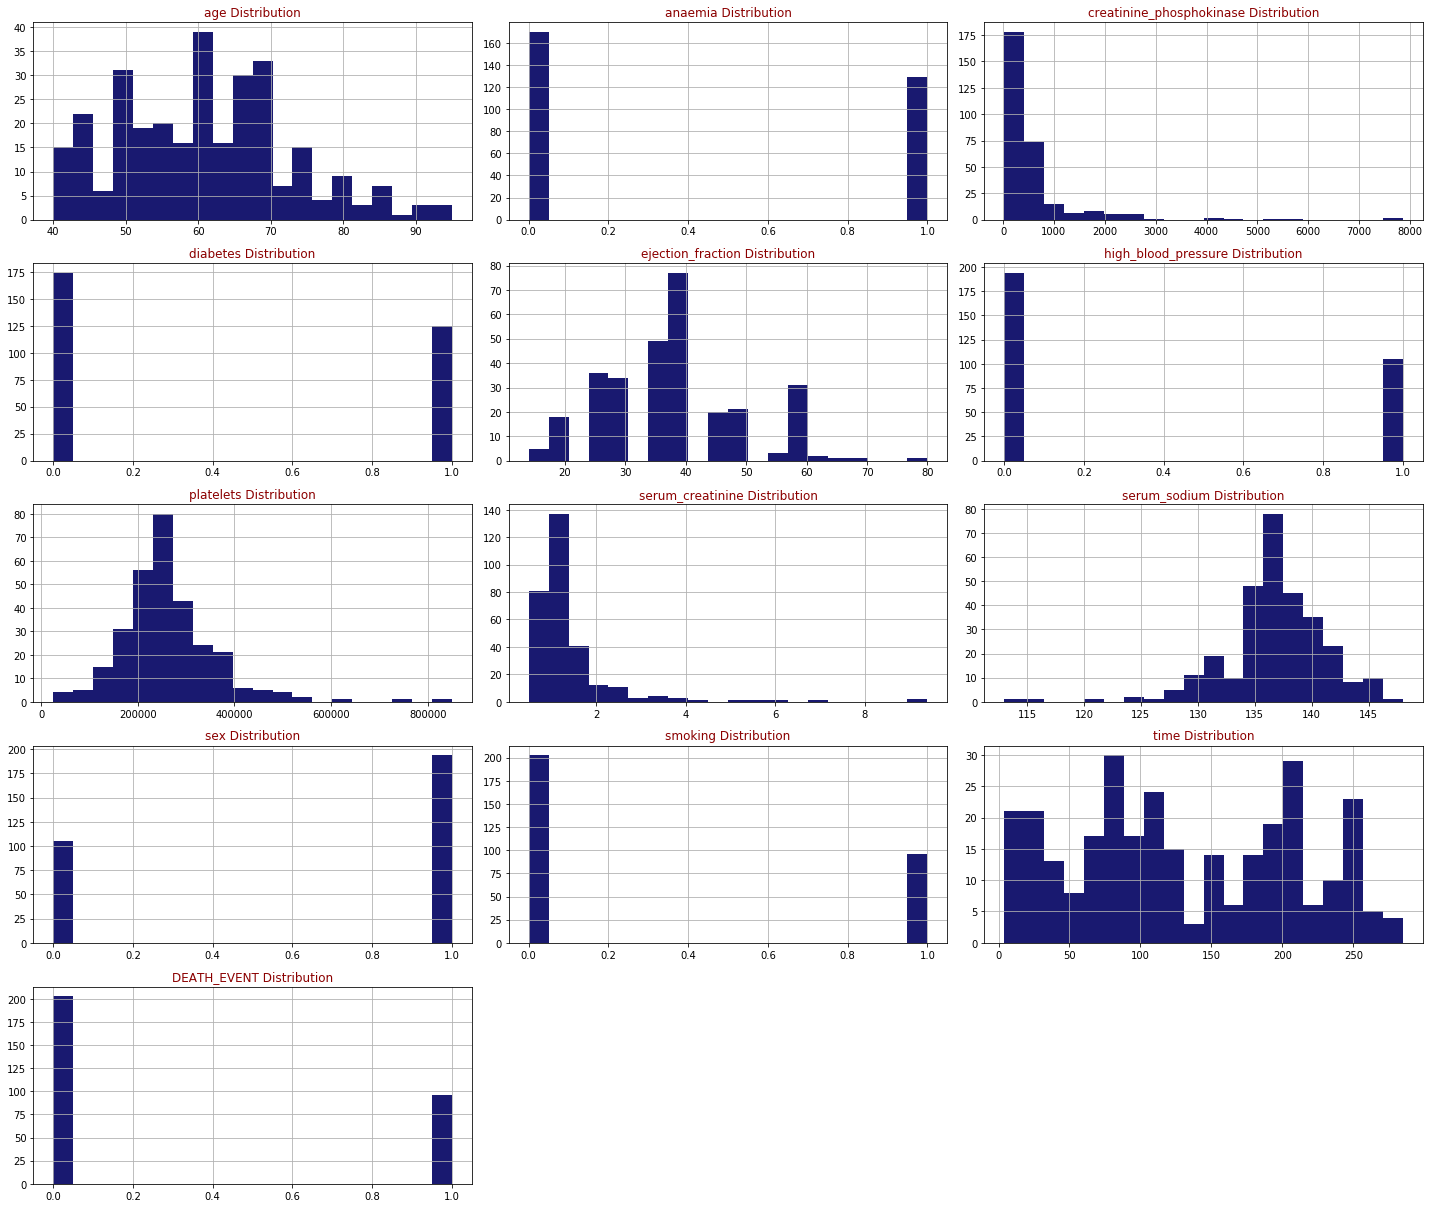

In [12]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [7]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()


C:\Users\ashwin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,1.0,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,1.0,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,1.0,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,1.0,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [25]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[48,  0],
       [24,  3]], dtype=int64)

In [7]:
import numpy as np 
X = np.asarray(df[['age','diabetes', 'high_blood_pressure','smoking']]) 
y = np.asarray(df['DEATH_EVENT']) 
  
# normalization of the datset 
X = preprocessing.StandardScaler().fit(X).transform(X) 
  
# Train-and-Test -Split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(  
        X, y, test_size = 0.3, random_state = 4) 
print ('Train set:', X_train.shape,  y_train.shape) 
print ('Test set:', X_test.shape,  y_test.shape) 


Train set: (209, 4) (209,)
Test set: (90, 4) (90,)


In [11]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 
y_pred = logreg.predict(X_test) 
  
# Evaluation and accuracy 
from sklearn.metrics import similarity_score 
print('') 
print('Accuracy of the model in similarity score is = ',  
      similarity_score(y_test, y_pred)) 

C:\Users\ashwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ImportError: cannot import name 'similarity_score' from 'sklearn.metrics' (C:\Users\ashwin\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

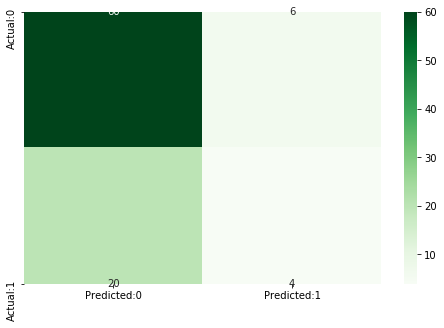

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        66
           1       0.40      0.17      0.24        24

    accuracy                           0.71        90
   macro avg       0.57      0.54      0.53        90
weighted avg       0.66      0.71      0.67        90



In [35]:
# Confusion matrix  
from sklearn.metrics import confusion_matrix, classification_report 
  
cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
  
print('The details for confusion matrix is =') 
print (classification_report(y_test, y_pred)) 